In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import time
import numpy as np
import matplotlib.pyplot as plt

# 设置中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

## 生成数据

In [2]:
# 设置随机数种子
torch.manual_seed(5)

# 生成数据集
def generate_data(num_samples, input_dim):
    # 构建权重和偏置
    weights = torch.ones(input_dim, 1) * 0.0056
    bias = 0.028

    # 生成输入特征和标签
    X = torch.randn(num_samples, input_dim)
    noise = torch.randn(num_samples, 1) * 0.1  # 添加高斯噪声
    y = torch.matmul(X, weights) + bias + noise

    return X, y

In [3]:
# 定义画图函数
def plot_loss(train_loss, test_loss, title):
    plt.figure(figsize=(10, 6), dpi=100)
    x = np.arange(len(train_loss)) 
    plt.plot(x, train_loss, label='train', color='red', linewidth=1)
    plt.plot(x, test_loss, label='test', color='blue', linewidth=1)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

## 1. 手动实现前馈神经网络

### 1.1 构建网络模型、损失、优化算法、训练函数

In [48]:
# 定义前馈神经网络类
class FeedForwardNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        
        W1 = torch.tensor(np.random.normal(0,0.01,(input_dim, hidden_dim)), dtype=torch.float)
        b1 = torch.zeros(hidden_dim, dtype=torch.float)
        W2 = torch.tensor(np.random.normal(0,0.01,(hidden_dim, output_dim)), dtype=torch.float)
        b2 = torch.zeros(output_dim, dtype=torch.float)
        
        self.params = [W1, b1, W2, b2]
        for param in self.params:
            param.requires_grad = True

    # Relu激活函数
    def MyRelu(self, X):
        return torch.max(torch.zeros_like(X), X)
    
    # 定义前向传播函数
    def forward(self, X):
        hidden_output = self.MyRelu(torch.matmul(X, self.params[0]) + self.params[1])
        output = torch.matmul(hidden_output, self.params[2]) + self.params[3]
        
        return output
    
    # 模型预测
    def predict(self, X):
        return self.forward(X)
    
# 定义均方误差损失函数 (MSE Loss)
def mse_loss(y_hat, y_true):
    return ((y_hat - y_true) ** 2).mean()

# 定义优化算法更新参数
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad

# 定义模型训练函数
def train(model, X, y, num_epochs, num_train, lr=0.01):
    start_time = time.time()  # 记录训练开始时间
    train_losses = []
    test_losses = []
    train_features, test_features = X[:num_train, :], X[num_train:, :]
    train_labels, test_labels = y[:num_train], y[num_train:]

    for epoch in range(num_epochs):
        # 前向传播
        train_hat = model.forward(train_features)

        # 计算损失
        train_loss = mse_loss(train_hat, train_labels)
        train_losses.append(train_loss)

        # 反向传播
        train_loss.backward()

        # 更新参数
        SGD(model.params, lr)

        # 计算测试损失值
        with torch.no_grad():
            test_hat = model.forward(test_features)
            test_loss = mse_loss(test_hat, test_labels)
            test_losses.append(test_loss)

        # 清除梯度
        for param in model.params:
            param.grad.data.zero_()

        # 打印输出损失值
        if (epoch + 1) % 5 == 0:
            print('epoch %d, train_loss %.4f, test_loss %.4f' % (epoch+1, train_loss.item(), test_loss.item()))

    end_time = time.time()  # 记录训练结束时间
    total_time = end_time - start_time
    print("总训练时间：%.2f秒" % total_time)
    
    return train_losses, test_losses




### 1.2 训练模型，并从训练时间、预测精度、Loss值可视化的角度分析结果

epoch 5, train_loss 0.0264, test_loss 0.0270
epoch 10, train_loss 0.0262, test_loss 0.0268
epoch 15, train_loss 0.0261, test_loss 0.0266
epoch 20, train_loss 0.0260, test_loss 0.0265
epoch 25, train_loss 0.0259, test_loss 0.0264
epoch 30, train_loss 0.0258, test_loss 0.0263
epoch 35, train_loss 0.0258, test_loss 0.0263
epoch 40, train_loss 0.0258, test_loss 0.0262
epoch 45, train_loss 0.0257, test_loss 0.0262
epoch 50, train_loss 0.0257, test_loss 0.0261
epoch 55, train_loss 0.0257, test_loss 0.0261
epoch 60, train_loss 0.0257, test_loss 0.0261
epoch 65, train_loss 0.0256, test_loss 0.0261
epoch 70, train_loss 0.0256, test_loss 0.0260
epoch 75, train_loss 0.0256, test_loss 0.0260
epoch 80, train_loss 0.0256, test_loss 0.0260
epoch 85, train_loss 0.0256, test_loss 0.0260
epoch 90, train_loss 0.0255, test_loss 0.0260
epoch 95, train_loss 0.0255, test_loss 0.0259
epoch 100, train_loss 0.0255, test_loss 0.0259
总训练时间：1.26秒
训练集均方误差: tensor(0.0255, grad_fn=<MeanBackward0>)
测试集均方误差: tensor(0.0

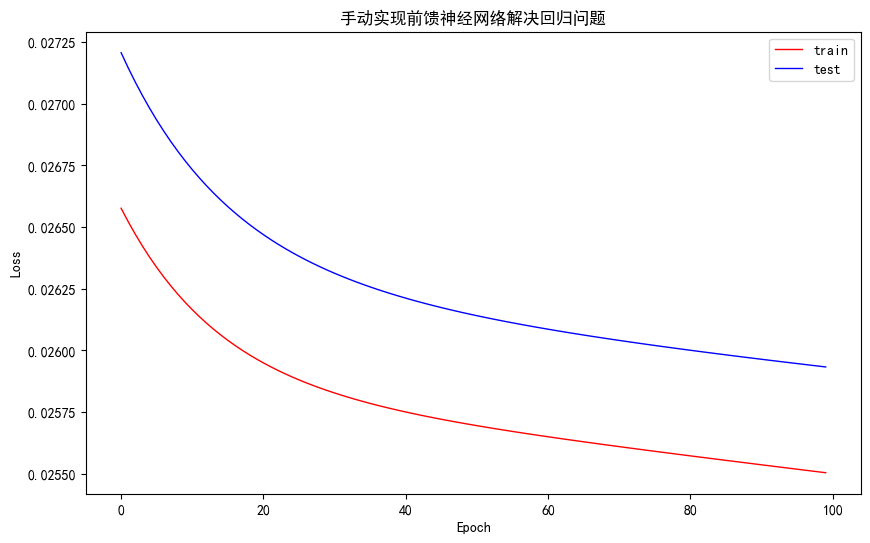

In [49]:
# 设置参数
train_samples = 7000
test_samples = 3000

input_size = 500
hidden_dim = 100
output_dim = 1

epochs = 100
learning_rate = 0.01

# 生成数据集并划分
X, labels = generate_data(train_samples+test_samples, input_size)

# 模型定义
model = FeedForwardNeuralNetwork(input_size, hidden_dim, output_dim)

# 训练模型
train_losses, test_losses = train(model, X, labels, epochs, num_train=train_samples, lr=learning_rate)

# 测试模型
y_pred_train = model.predict(X[:train_samples,])
y_pred_test = model.predict(X[train_samples:,])

# 计算训练集和测试集的均方误差
mse_train = torch.mean((y_pred_train - labels[:train_samples,]) ** 2)
mse_test = torch.mean((y_pred_test - labels[train_samples:,]) ** 2)

print("训练集均方误差:", mse_train)
print("测试集均方误差:", mse_test)

train_losses = [tensor.detach().numpy() for tensor in train_losses]
test_losses = [tensor.detach().numpy() for tensor in test_losses]

plot_loss(train_losses, test_losses, title="手动实现前馈神经网络解决回归问题")

### 1.3 实验结果分析

#### 训练时间
在该回归任务中，训练时间为1.26秒，可见模型训练的非常快，因为模型只有一层隐藏层，且参数量不算大

#### 预测精度
因为是回归任务，采用均方误差mse作为评价指标，训练集均方误差为0.0255，测试集均方误差为0.0259，都比较小，说明预测比较准确

#### Loss变化情况
从上图可以看出，Loss值较小，并且到后面测试集的Loss值变化很小，说明模型的预测性能变化不大

## 2. 基于PyTorch构建前馈神经网络

### 2.1 构建网络模型

In [4]:
# 定义前馈神经网络模型
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
    # 模型预测
    def predict(self, x):
        out = self.forward(x)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 定义模型参数
num_samples = 10000
num_train = 7000
num_test = 3000
input_dim = 500
hidden_dim = 100
output_dim = 1

# 生成数据
X, y = generate_data(num_samples=num_samples, input_dim=input_dim)

# 创建模型实例
model = FeedforwardNN(input_dim, hidden_dim, output_dim).to(device)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 2.2 训练网络，并从训练时间、预测精度、Loss值可视化的角度分析结果

epoch 5, train_loss 0.0293, test_loss 0.0311
epoch 10, train_loss 0.0290, test_loss 0.0308
epoch 15, train_loss 0.0287, test_loss 0.0306
epoch 20, train_loss 0.0285, test_loss 0.0303
epoch 25, train_loss 0.0282, test_loss 0.0301
epoch 30, train_loss 0.0279, test_loss 0.0299
epoch 35, train_loss 0.0277, test_loss 0.0297
epoch 40, train_loss 0.0275, test_loss 0.0294
epoch 45, train_loss 0.0272, test_loss 0.0292
epoch 50, train_loss 0.0270, test_loss 0.0290
epoch 55, train_loss 0.0268, test_loss 0.0288
epoch 60, train_loss 0.0266, test_loss 0.0286
epoch 65, train_loss 0.0264, test_loss 0.0285
epoch 70, train_loss 0.0262, test_loss 0.0283
epoch 75, train_loss 0.0260, test_loss 0.0281
epoch 80, train_loss 0.0258, test_loss 0.0279
epoch 85, train_loss 0.0256, test_loss 0.0278
epoch 90, train_loss 0.0254, test_loss 0.0276
epoch 95, train_loss 0.0252, test_loss 0.0274
epoch 100, train_loss 0.0251, test_loss 0.0273

总训练时间：0.98秒

训练集均方误差: tensor(0.0250, grad_fn=<MeanBackward0>)
测试集均方误差: tensor(0

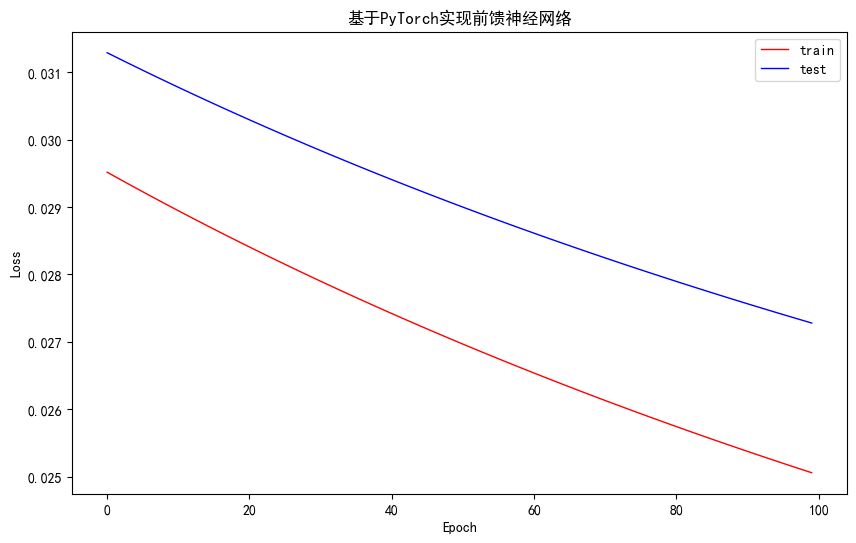

In [8]:
# 定义模型训练函数
def train(model, X, y, num_epochs, num_train, lr=0.01):

    start_time = time.time()  # 记录训练开始时间

    # 记录损失值
    train_losses = []
    test_losses = []
    
    # 划分数据集
    # 划分训练集和测试集
    x_train, x_test = X[:num_train,].to(device), X[num_train:,].to(device)
    y_train, y_test = y[:num_train].to(device), y[num_train:].to(device)

    for epoch in range(num_epochs):
        # 切换模型为训练模式
        model.train()
        # 前向传播
        train_hat = model.forward(x_train)

        # 计算损失
        train_loss = criterion(train_hat, y_train)
        train_losses.append(train_loss)

        # 反向传播
        train_loss.backward()

        # 更新参数
        optimizer.step()

        # 计算测试损失值
        with torch.no_grad():
            # 切换为测试模型
            model.eval()
            test_hat = model.forward(x_test)
            test_loss = criterion(test_hat, y_test)
            test_losses.append(test_loss)

        # 清除梯度
        optimizer.zero_grad()

        # 打印输出损失值
        if (epoch + 1) % 5 == 0:
            print('epoch %d, train_loss %.4f, test_loss %.4f' % (epoch+1, train_loss.item(), test_loss.item()))

    end_time = time.time()  # 记录训练结束时间
    total_time = end_time - start_time
    print("\n总训练时间：%.2f秒" % total_time)
    
    return train_losses, test_losses

# 训练模型
train_losses, test_losses = train(model, X, y, num_epochs=100, num_train=num_train, lr=0.01)

# 计算模型预测的均方误差mse
y_pred_train = model.predict(X[:num_train,])
y_pred_test = model.predict(X[num_train:,])


mse_train = torch.mean((y_pred_train - y[:num_train,]) ** 2)
mse_test = torch.mean((y_pred_test - y[num_train:,]) ** 2)

print("\n训练集均方误差:", mse_train)
print("测试集均方误差:", mse_test)

# 绘制误差图
train_losses = [tensor.detach().numpy() for tensor in train_losses]
test_losses = [tensor.detach().numpy() for tensor in test_losses]
plot_loss(train_losses, test_losses, title='基于PyTorch实现前馈神经网络')

### 2.3 实验结果分析

#### 训练时间
在该回归任务中，训练时间为0.98秒，对比可知在同样的模型参数量下，基于PyTorch实现的模型训练速度要比手动实现快，且两种模型训练时间都较短，因为模型结构较为单一

#### 预测精度
因为是回归任务，采用均方误差mse作为评价指标，训练集得到的均方误差为0.025，测试集得到的均方误差为0.0273，都比较小，说明预测比较准确

#### Loss变化情况
从上图可以看出，Loss值较小，并且训练集和测试集的损失值变化趋势相似，得出的结论是模型对于训练集和测试集，预测效果很接近